In [1]:
# Data first collected about 77.5 hours
# (already had 15 wins)

from fallGuysStructures import *
from fallGuysFcns import *
import fallGuysVisuals as fgv

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os, datetime
import pandas as pd
import numpy as np

plt.rcParams['font.size'] = 14

shows_df, rounds_df, qual_df = getDataFrames()

finals_df = rounds_df[np.isin(rounds_df['Map'], list_of_finals)] # just finals
non_finals_df = rounds_df[~np.isin(rounds_df['Map'], list_of_finals)] # remove finals

get rid of personal in path


In [2]:
shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns
274,275,2021-02-13 15:41:24.769000,3,288.454,event_only_jump_club_1202_to_1402_2021,True,4,Clever Green Ogre,1,21:46:13.223,265,0,0
275,276,2021-02-13 15:47:17.708000,3,501.191,event_only_jump_club_1202_to_1402_2021,True,4,Clever Green Ogre,1,21:55:38.899,265,0,0
276,277,2021-02-13 15:56:59.901000,3,399.972,event_only_jump_club_1202_to_1402_2021,True,4,Clever Green Ogre,1,22:03:39.873,265,0,0
277,278,2021-02-13 16:04:31.441000,3,241.537,event_only_jump_club_1202_to_1402_2021,False,3,Clever Green Ogre,1,22:08:32.978,180,0,0
278,279,2021-02-13 16:09:21.311000,3,505.708,event_only_jump_club_1202_to_1402_2021,True,4,Clever Green Ogre,1,22:17:47.019,265,0,0


In [3]:
rounds_df.tail(10)

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score
1024,277,1,round_jump_club_event_only_02,35.991,36.8,True,3,20,0,0.0,35,0,gold,20,75,15.0,NaN
1025,277,2,round_jump_club_event_only_03,34.108,34.118,True,3,60,0,0.0,35,0,gold,15,65,9.0,NaN
1026,277,3,round_jump_showdown_jump_club_event_only_final,108.288,uncertain,False,3,50,0,3.0,0,0,NaN,9,0,0.0,NaN
1027,278,0,round_jump_club_event_only_01,28.844,28.871,True,19,30,0,0.0,35,0,gold,30,80,23.0,NaN
1028,278,1,round_jump_club_event_only_02,29.368,29.383,True,8,20,0,0.0,35,0,gold,22,75,16.0,NaN
1029,278,2,round_jump_club_event_only_03,26.153,uncertain,False,16,60,0,3.0,0,0,NaN,16,65,0.0,NaN
1030,279,0,round_jump_club_event_only_01,39.176,39.188,True,7,30,0,0.0,35,0,gold,30,80,23.0,NaN
1031,279,1,round_jump_club_event_only_02,33.652,33.66,True,11,20,0,0.0,35,0,gold,21,75,15.0,NaN
1032,279,2,round_jump_club_event_only_03,39.915,39.923,True,6,60,0,0.0,35,0,gold,14,65,9.0,NaN
1033,279,3,round_jump_showdown_jump_club_event_only_final,193.655,193.66,False,2,50,0,3.0,0,0,NaN,9,0,1.0,NaN


# Map Stats

In [4]:
maps_df = getMapInfoDataFrame(rounds_df, qual_df)
maps_df.head(10)

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_biggestfan,Big Fans,Race,60,60,100.000000,8.650000,8.650000,84.249717,55.290,177.517917,5135,2616,85.583333,43.600000,NaN,2,41,15,1.283333
round_wall_guys,Wall Guys,Race,48,35,72.916667,9.541667,6.657143,78.899971,39.903,98.319486,4125,1712,85.937500,35.666667,NaN,2,10,17,2.104167
round_tunnel,Roll Out,Survival,38,32,84.210526,16.236842,13.312500,75.603000,22.657,75.612531,2120,1146,55.789474,30.157895,NaN,32,0,0,0.473684
round_dodge_fall,Fruit Chute,Race,38,30,78.947368,7.710526,6.033333,37.458133,30.552,45.967700,3535,1487,93.026316,39.131579,NaN,1,10,18,1.921053
round_floor_fall_event_only_01,None,None,37,35,94.594595,7.783784,7.285714,38.025314,14.903,38.047771,2335,1740,63.108108,47.027027,NaN,35,0,0,0.162162
round_see_saw,See Saw,Race,37,37,100.000000,14.324324,14.324324,89.025622,57.523,134.084054,2880,1702,77.837838,46.000000,NaN,1,18,13,1.594595
round_gauntlet_04,Knight Fever,Race,37,37,100.000000,9.648649,9.648649,55.937108,42.153,97.088730,3045,1638,82.297297,44.270270,NaN,5,15,16,1.351351
round_jump_club_event_only_01,None,None,36,33,91.666667,12.416667,11.181818,36.279212,27.674,36.300909,2235,474,62.083333,13.166667,NaN,33,0,0,0.250000
round_floor_fall_event_only_02,None,None,35,32,91.428571,5.657143,5.187500,62.274469,51.185,62.282469,1820,1276,52.000000,36.457143,NaN,32,0,0,0.257143
round_jump_club_event_only_02,None,None,33,30,90.909091,10.909091,9.933333,34.052367,26.500,34.100667,1710,306,51.818182,9.272727,NaN,30,0,0,0.272727


# Round Stats

In [5]:
# Give a switch to say if finals should be separate or not?
rounds_data_df = getRoundInfoDataFrame(rounds_df)
rounds_data_df

,Attempted,Qualified,Percent
Round Num,,,
1,279,269,96.415771
2,269,243,90.334572
3,208,164,78.846154
4,129,78,60.465116
5,4,1,25.000000
final,145,17,11.724138


# Show Stats

In [6]:
# add new things to 'getShowStats'
shows_info_df = getShowsInfoDataFrame(shows_df)
shows_info_df

,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
2,117,8,47,598.054487,3.931624,360.811966,153.965812,40.170940,6.837607,19.436771,145.775781
3,162,10,101,448.665414,3.543210,289.413580,126.469136,62.345679,6.172840,20.189944,121.139662
total,279,18,148,511.312444,3.706093,319.354839,138.000000,53.046595,6.451613,39.626714,132.089048


# Playlist Stats

In [7]:
playlist_df = getPlaylistInfoDataFrame(shows_df)
playlist_df

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:408: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
main_show,181,17,81,590.616282,3.977901,378.674033,167.254144,44.751381,9.392265,29.694874,104.805438
event_only_hard_mode_2111_to_2711,2,0,0,325.063500,2.500000,132.500000,61.500000,0.000000,0.000000,0.180591,inf
event_season_3_highlight_1512_to_1912,9,0,5,571.339111,4.111111,305.555556,163.666667,55.555556,0.000000,1.428348,inf
event_only_floor_fall_0501_to_0701,37,1,32,340.677270,2.810811,184.054054,103.216216,86.486486,2.702703,3.501405,210.084317
event_fruit_basket_0801_to_1401,1,0,1,310.640000,3.000000,180.000000,106.000000,100.000000,0.000000,0.086289,inf
event_only_survival_2501_to_0102_2021,3,0,0,390.081333,2.666667,171.666667,104.666667,0.000000,0.000000,0.325068,inf
event_only_season_3_variation_0202_to_0702_2021,3,0,1,431.502000,3.333333,208.333333,118.333333,33.333333,0.000000,0.359585,inf
event_fan_favourites_0802_to_1102_2021,7,0,3,492.582571,3.285714,220.714286,121.857143,42.857143,0.000000,0.957799,inf
event_only_jump_club_1202_to_1402_2021,36,0,25,309.275528,3.444444,218.611111,32.944444,69.444444,0.000000,3.092755,inf
total,279,18,148,511.312444,3.706093,319.354839,138.000000,53.046595,6.451613,39.626714,132.089048


# Other

In [8]:
maps_df[ maps_df['Type'] == 'Final' ]

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall,Hex-A-Gone,Final,23,2,8.695652,4.086957,1.0,106.807000,92.734,106.818000,3020,946,131.304348,41.130435,NaN,2,0,0,2.739130
round_fall_mountain_hub_complete,Fall Mountain,Final,21,7,33.333333,3.857143,1.0,38.216286,35.305,35.566286,6605,1885,314.523810,89.761905,NaN,7,0,0,2.000000
round_jump_showdown,Jump Showdown,Final,21,3,14.285714,5.428571,1.0,183.094333,142.522,183.097333,3625,1094,172.619048,52.095238,NaN,3,0,0,2.571429
round_thin_ice,Thin Ice,Final,12,3,25.000000,3.666667,1.0,131.022333,105.602,131.025000,2965,809,247.083333,67.416667,NaN,3,0,0,2.250000
round_tunnel_final,Roll Off,Final,9,0,0.000000,4.444444,NaN,NaN,NaN,NaN,630,270,70.000000,30.000000,NaN,0,0,0,3.000000
round_royal_rumble,Royal Fumble,Final,3,1,33.333333,3.333333,1.0,92.772000,92.772,90.400000,905,233,301.666667,77.666667,NaN,1,0,0,2.000000


In [9]:
# number of times eliminated
rounds_df[rounds_df['Qualified'] == False]['Map'].value_counts()

round_floor_fall_event_only_final                 30
round_jump_showdown_jump_club_event_only_final    25
round_floor_fall                                  21
round_jump_showdown                               18
round_fall_mountain_hub_complete                  14
round_wall_guys                                   13
round_thin_ice                                     9
round_tunnel_final                                 9
round_fall_ball_60_players                         9
round_dodge_fall                                   8
round_hoops                                        7
round_hoops_blockade_solo                          7
round_tail_tag                                     6
round_tunnel                                       6
round_tip_toe                                      5
round_jump_club_event_only_03                      5
round_lava                                         5
round_block_party                                  5
round_snowy_scrap                             

In [10]:
# wins
finals_df[finals_df['Qualified']]

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score
38,11,4,round_jump_showdown,181.522,181.524,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN
207,54,4,round_fall_mountain_hub_complete,39.191,36.421,True,1,770,210,0.0,35,18,gold,5,0,1.0,NaN
215,56,4,round_floor_fall,120.880,120.9,True,1,770,210,0.0,35,18,gold,12,0,1.0,NaN
293,75,4,round_jump_showdown,142.522,142.524,True,1,770,210,0.0,35,18,gold,8,0,1.0,NaN
298,76,4,round_fall_mountain_hub_complete,38.975,36.203,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN
317,82,4,round_fall_mountain_hub_complete,38.835,36.86,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN
356,91,4,round_fall_mountain_hub_complete,38.281,35.516,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN
416,106,4,round_fall_mountain_hub_complete,35.305,32.538,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN
503,128,4,round_jump_showdown,225.239,225.244,True,1,770,175,0.0,35,18,gold,13,0,1.0,NaN
534,135,4,round_fall_mountain_hub_complete,39.421,36.672,True,1,770,175,0.0,35,18,gold,12,0,1.0,NaN


# Visuals

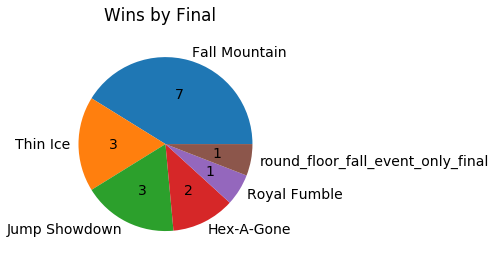

In [11]:
# pie chart for final map wins
fgv.finalMapWinsPie(finals_df);

gold           1
silver        10
bronze        18
none           1
eliminated     8
Name: BadgeId, dtype: int64

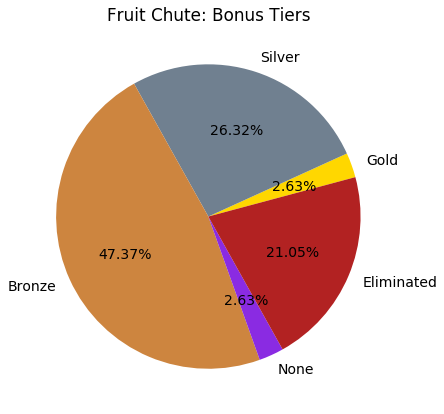

In [12]:
# pie chart for a certain map - bonus tier
fgv.mapBonusTiersPie(rounds_df, 'round_dodge_fall', eliminated=True, percent=True)

main_show                             15
event_only_floor_fall_0501_to_0701     1
Name: Game Mode, dtype: int64

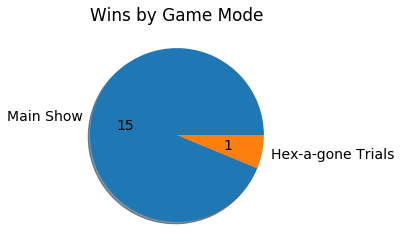

In [13]:
# pie chart for shows
fgv.showWinsPie(shows_df)

In [14]:
# extra for now
# times played each show
shows_df['Game Mode'].value_counts()

main_show                                          181
event_only_floor_fall_0501_to_0701                  37
event_only_jump_club_1202_to_1402_2021              36
event_season_3_highlight_1512_to_1912                9
event_fan_favourites_0802_to_1102_2021               7
event_only_season_3_variation_0202_to_0702_2021      3
event_only_survival_2501_to_0102_2021                3
event_only_hard_mode_2111_to_2711                    2
event_fruit_basket_0801_to_1401                      1
Name: Game Mode, dtype: int64

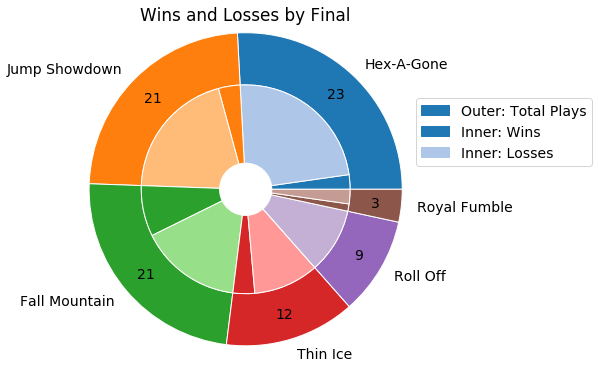

In [15]:
# plays vs wins and losses by final map
fgv.finalsWinsLossesPie(finals_df, regular=True, total_num=True); 

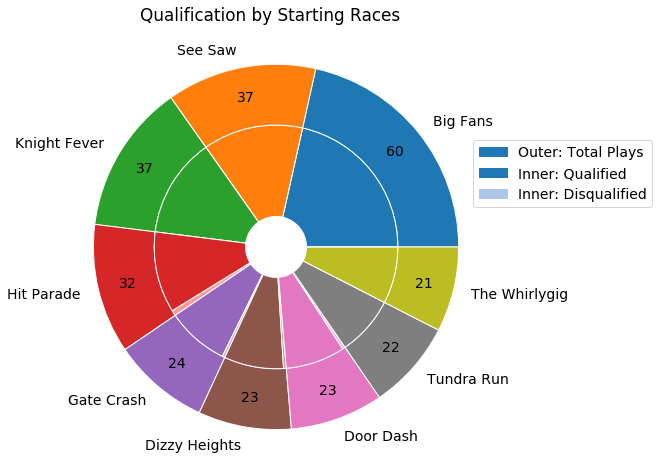

In [16]:
# qualfied vs non_qualified for starting races
fgv.startingRacesPie(rounds_df, total_num=True, pie_size=(7,7));

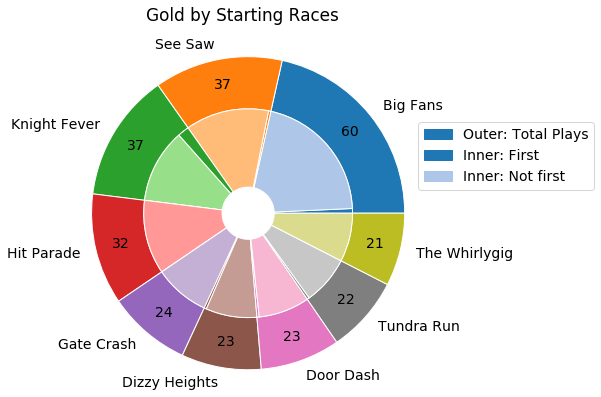

In [17]:
fgv.startingRacesPie(rounds_df, inner='gold', title='Gold by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='First', inner_neg_title='Not first', total_num=True);

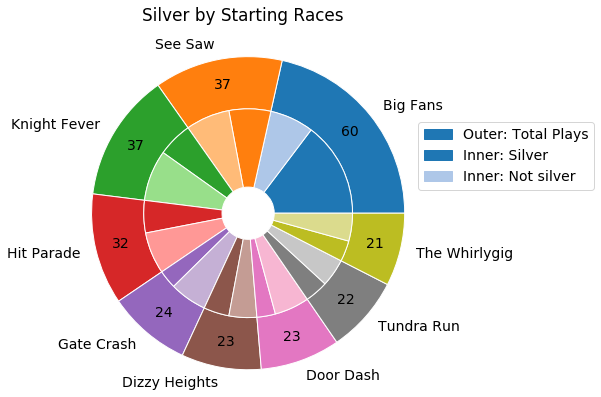

In [18]:
fgv.startingRacesPie(rounds_df, inner='silver', title='Silver by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Silver', inner_neg_title='Not silver', total_num=True);

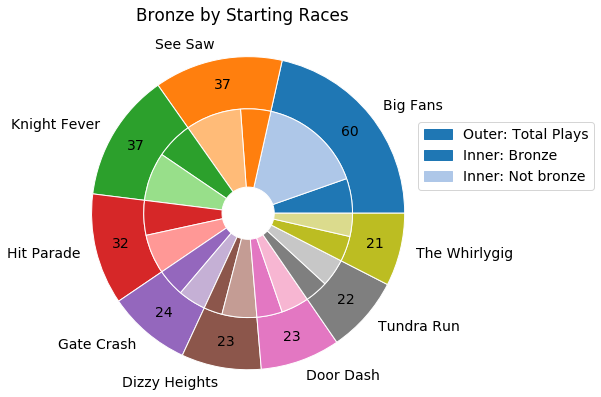

In [19]:
fgv.startingRacesPie(rounds_df, inner='bronze', title='Bronze by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Bronze', inner_neg_title='Not bronze', total_num=True);